In [60]:
!cp -r /content/drive/MyDrive/ICU_Dataset/ICUDatasetProcessed .

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [61]:
import numpy as np  
import pandas as pd
import os 
from sklearn.model_selection import train_test_split

In [62]:
df1 = pd.DataFrame()


In [63]:
df1 = pd.read_csv("C:\\Users\\talha\\OneDrive\\Desktop\\FINAL YEAR PG PROJECT\\Dataset\\IoT-Healthcare-Security-Dataset-main\\IoT-Healthcare-Security-Dataset-main\\Dataset\\ICUDatasetProcessed\\ICUDatasetProcessed\\environmentMonitoring.csv")
df1.columns

Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta',
       'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn',
       'tcp.flags.urg', 'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size',
       'tcp.window_size_value', 'tcp.checksum', 'mqtt.clientid',
       'mqtt.clientid_len', 'mqtt.conack.flags', 'mqtt.conack.val',
       'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved',
       'mqtt.conflag.retain', 'mqtt.conflag.willflag', 'mqtt.conflags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg',
       'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.topic',
       'mqtt.topic_len', 'mqtt.ver', 'mqtt.willmsg_len', 'ip.proto', 'ip.ttl',
       'class', 'label'],
      dtype='object')

In [64]:
import os
path = "C:\\Users\\talha\\OneDrive\\Desktop\FINAL YEAR PG PROJECT\\Dataset\\IoT-Healthcare-Security-Dataset-main\\IoT-Healthcare-Security-Dataset-main\\Dataset\\ICUDatasetProcessed\\ICUDatasetProcessed\\"
csvs = os.listdir(path)
csvs

['Attack.csv', 'environmentMonitoring.csv', 'patientMonitoring.csv']

In [65]:
df_initial = pd.read_csv("C:\\Users\\talha\\OneDrive\\Desktop\\FINAL YEAR PG PROJECT\\Dataset\\IoT-Healthcare-Security-Dataset-main\\IoT-Healthcare-Security-Dataset-main\\Dataset\\ICUDatasetProcessed\\ICUDatasetProcessed\\environmentMonitoring.csv")


In [66]:
import pandas as pd

df1 = pd.DataFrame()

for csv in csvs:
  print(f'---- Reading {csv} ----')
  df = pd.read_csv(path+csv)
  print(f'df.shape: {df.shape}')
  empty_cols = [col for col in df.columns if df[col].isnull().all()]
  print(f'empty_cols: {len(empty_cols)}')
  print(empty_cols)
  df.fillna(0, inplace=True)
  df1 = pd.concat([df1, df], ignore_index=True)
  print(f'df1.shape: {df1.shape}')

---- Reading Attack.csv ----


C:\Users\talha\AppData\Local\Temp\ipykernel_33960\1231825296.py:7: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+csv)


df.shape: (80126, 52)
empty_cols: 0
[]
df1.shape: (80126, 52)
---- Reading environmentMonitoring.csv ----
df.shape: (31758, 52)
empty_cols: 0
[]
df1.shape: (111884, 52)
---- Reading patientMonitoring.csv ----
df.shape: (76810, 52)
empty_cols: 0
[]
df1.shape: (188694, 52)


C:\Users\talha\AppData\Local\Temp\ipykernel_33960\1231825296.py:7: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+csv)


In [67]:
feats = ['ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport','mqtt.topic', 'mqtt.msg', 'tcp.payload','mqtt.clientid', 'mqtt.conflags', 'mqtt.conack.flags', 'class']

In [68]:
df1.drop(labels=feats, axis=1, inplace=True)
df1.shape

(188694, 41)

In [69]:
fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 
        'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl', 'label']
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver', 'label']

In [70]:
df1 = df1[fs2]
df1.shape

(188694, 11)

In [71]:
df1['label'].value_counts()

label
0    108568
1     80126
Name: count, dtype: int64

In [72]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#df1['tcp.flags']= label_encoder.fit_transform(df1['tcp.flags'])
#df1['tcp.checksum']= label_encoder.fit_transform(df1['tcp.checksum'])
df1['mqtt.hdrflags']= label_encoder.fit_transform(df1['mqtt.hdrflags'])



In [73]:
X_train, X_test, y_train, y_test = train_test_split( df1.drop(labels=['label'], axis=1), df1['label'], 
                                                                            test_size=0.3, random_state=100)

In [74]:
fs1 =  ['frame.time_delta', 'tcp.flags', 'tcp.time_delta', 'tcp.connection.rst', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.hdr_len', 'mqtt.clientid_len', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.ver', 'ip.proto', 'ip.ttl']
fs2 = ['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.ver']

In [75]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

print('---------- SelectFromModel LogisticRegression -----------')
embeded_LR_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), threshold='0.9*median',
                                      max_features = 10)
embeded_LR_selector.fit(X_train, y_train)
embeded_LR_support = embeded_LR_selector.get_support()
print('embeded_LR_support',embeded_LR_support)
#embeded_lr_selector = embeded_lr_selector.scores_
#embeded_lr_support = embeded_lr_selector.get_support()
#embeded_LR_feature = df.loc[:,embeded_LR_support].columns.tolist()

embeded_LR_feature = X_train.loc[:,embeded_LR_support].columns.tolist()

print(len(embeded_LR_feature), 'selected features')
print('embeded_LR_features: ', embeded_LR_feature)

---------- SelectFromModel LogisticRegression -----------
embeded_LR_support [False  True  True  True False False False  True  True False]
5 selected features
embeded_LR_features:  ['tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push', 'mqtt.qos', 'mqtt.retain']


In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import linear_model #Linear Regression
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC   #SVM
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report

In [77]:

print('--------Applying GaussianNB Classifier ----------')
gnb = GaussianNB()
gnb_fit = gnb.fit(X_train, y_train)  
gnb_prediction = gnb.predict(X_test) 


print('--------Applying KNeighborsClassifier Classifier ----------')
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

print('--------Applying RandomForestClassifier Classifier ----------')
RF = RandomForestClassifier(max_depth=10, random_state=100)  
RF.fit(X_train, y_train)
RF_prediction = RF.predict(X_test)


print('--------Applying AdaBoostClassifier Classifier ----------')
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
AB_prediction = AB.predict(X_test)


print('--------Applying LogisticRegression Classifier ----------')
#LogR = LogisticRegression()
LogR = linear_model.LogisticRegression()
LogR.fit(X_train, y_train)
LogR_prediction = LogR.predict(X_test)


print('--------Applying DecisionTree Classifier ----------')
DT = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)
DT.fit(X_train, y_train)
DT_prediction = DT.predict(X_test)


# Add BaggingClassifier to your classifiers
print('--------Applying BaggingClassifier ----------')
bagging = BaggingClassifier()
bagging.fit(X_train, y_train)
bagging_prediction = bagging.predict(X_test)


# Add GradientBoostingClassifier to your classifiers
print('--------Applying GradientBoostingClassifier ----------')
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_prediction = gradient_boosting.predict(X_test)


# Add ExtraTreesClassifier to your classifiers
print('--------Applying ExtraTreesClassifier ----------')
extra_trees = ExtraTreesClassifier()
extra_trees.fit(X_train, y_train)
extra_trees_prediction = extra_trees.predict(X_test)


--------Applying GaussianNB Classifier ----------
--------Applying KNeighborsClassifier Classifier ----------
--------Applying RandomForestClassifier Classifier ----------
--------Applying AdaBoostClassifier Classifier ----------
--------Applying LogisticRegression Classifier ----------


c:\Users\talha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------Applying DecisionTree Classifier ----------
--------Applying BaggingClassifier ----------
--------Applying GradientBoostingClassifier ----------
--------Applying ExtraTreesClassifier ----------


In [78]:
print('-------Performance Evaluation----------')
#precision_score, recall_score, f1_score, accuracy_score
results = []
selector = 'LR'
results.append((selector,'','', '',''))
results.append(('Classifier','Accurary','Precision', 'Recall','F1-Score'))
results.append(('NB ', accuracy_score(y_test,  gnb_prediction)*100,
                precision_score(y_test,  gnb_prediction)*100,
                recall_score(y_test,  gnb_prediction)*100,
                f1_score(y_test,  gnb_prediction)*100))
results.append(('KNN ', accuracy_score(y_test, KNN_prediction)*100,
                precision_score(y_test, KNN_prediction)*100,
                recall_score(y_test, KNN_prediction)*100,
                f1_score(y_test, KNN_prediction)*100))
results.append(('RF ', accuracy_score(y_test,  RF_prediction)*100,
                precision_score(y_test,  RF_prediction)*100,
                recall_score(y_test,  RF_prediction)*100,
                f1_score(y_test,  RF_prediction)*100))
results.append(('AB ', accuracy_score(y_test,  AB_prediction)*100,
                precision_score(y_test,  AB_prediction)*100,
                recall_score(y_test,  AB_prediction)*100,
                f1_score(y_test,  AB_prediction)*100))
results.append(('LogR ', accuracy_score(y_test,  LogR_prediction)*100,
                precision_score(y_test,  LogR_prediction)*100,
                recall_score(y_test,  LogR_prediction)*100,
                f1_score(y_test,  LogR_prediction)*100))
results.append(('DT ', accuracy_score(y_test,  DT_prediction)*100,
                precision_score(y_test,  DT_prediction)*100,
                recall_score(y_test,  DT_prediction)*100,
                f1_score(y_test,  DT_prediction)*100))
results.append(('Bagging', accuracy_score(y_test,  bagging_prediction)*100,
                precision_score(y_test,  bagging_prediction)*100,
                recall_score(y_test,  bagging_prediction)*100,
                f1_score(y_test,  bagging_prediction)*100))
results.append(('Gradient Boosting', accuracy_score(y_test,  gradient_boosting_prediction)*100,
                precision_score(y_test,  gradient_boosting_prediction)*100,
                recall_score(y_test,  gradient_boosting_prediction)*100,
                f1_score(y_test,  gradient_boosting_prediction)*100))
results.append(('Extra Trees', accuracy_score(y_test,  extra_trees_prediction)*100,
                precision_score(y_test,  extra_trees_prediction)*100,
                recall_score(y_test,  extra_trees_prediction)*100,
                f1_score(y_test,  extra_trees_prediction)*100))

print('type(results): ', type(results))
print('results: ', results)
df_results = pd.DataFrame(results)
print('type(df_results): ', type(df_results))
print('df_results: ', df_results)

-------Performance Evaluation----------
type(results):  <class 'list'>
results:  [('LR', '', '', '', ''), ('Classifier', 'Accurary', 'Precision', 'Recall', 'F1-Score'), ('NB ', 79.67107703722023, 99.705296694544, 52.18225019800742, 68.50919439579684), ('KNN ', 99.64669928809906, 99.7074679259476, 99.45808495560465, 99.58262030969573), ('RF ', 99.70676040912223, 99.79515906525647, 99.51227646004419, 99.6535170110624), ('AB ', 99.55484110300482, 99.4459025955089, 99.50393930551503, 99.47491248541424), ('LogR ', 95.28696850324152, 90.35164086452932, 99.50393930551503, 94.70718933502619), ('DT ', 99.69439488420569, 99.79926396788224, 99.47892784192754, 99.6388384376109), ('Bagging', 99.69262838064618, 99.72854458133223, 99.54562507816082, 99.63700087620478), ('Gradient Boosting', 99.56014061368333, 99.57400601403275, 99.3872191421068, 99.48052489933866), ('Extra Trees', 99.68202935928916, 99.7326314909972, 99.51644503730877, 99.62442098234779)]
type(df_results):  <class 'pandas.core.frame.

In [79]:
print('Confusion Matrix gnb_prediction')
print(confusion_matrix(y_test,gnb_prediction))
print('Confusion Matrix KNN_prediction')
print(confusion_matrix(y_test,KNN_prediction))
print('Confusion Matrix RF_prediction')
print(confusion_matrix(y_test,RF_prediction))
print('Confusion Matrix AB_prediction')
print(confusion_matrix(y_test,AB_prediction))
print('Confusion Matrix LogR_prediction')
print(confusion_matrix(y_test,LogR_prediction))
print('Confusion Matrix DT_prediction')
print(confusion_matrix(y_test,DT_prediction))
print('Confusion Matrix BaggingClassifier')
print(confusion_matrix(y_test, bagging_prediction))
print('Confusion Matrix GradientBoostingClassifier')
print(confusion_matrix(y_test, gradient_boosting_prediction))
print('Confusion Matrix ExtraTreesClassifier')
print(confusion_matrix(y_test, extra_trees_prediction))



Confusion Matrix gnb_prediction
[[32583    37]
 [11471 12518]]
Confusion Matrix KNN_prediction
[[32550    70]
 [  130 23859]]
Confusion Matrix RF_prediction
[[32571    49]
 [  117 23872]]
Confusion Matrix AB_prediction
[[32487   133]
 [  119 23870]]
Confusion Matrix LogR_prediction
[[30071  2549]
 [  119 23870]]
Confusion Matrix DT_prediction
[[32572    48]
 [  125 23864]]
Confusion Matrix BaggingClassifier
[[32555    65]
 [  109 23880]]
Confusion Matrix GradientBoostingClassifier
[[32518   102]
 [  147 23842]]
Confusion Matrix ExtraTreesClassifier
[[32556    64]
 [  116 23873]]


In [84]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
# Define the base classifiers
clf1 = GaussianNB()
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = RandomForestClassifier(max_depth=10, random_state=100)
clf4 = AdaBoostClassifier()
clf5 = linear_model.LogisticRegression()
clf6 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10, min_samples_leaf=5)

# Create the VotingClassifier
voting_clf = VotingClassifier(estimators=[('gnb', clf1), ('knn', clf2), ('rf', clf3), ('ab', clf4), ('lr', clf5), ('dt', clf6)], voting='soft')

# Fit the VotingClassifier
voting_clf.fit(X_train, y_train)

# Make predictions
voting_prediction = voting_clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, voting_prediction)*100
precision = precision_score(y_test, voting_prediction)*100
recall = recall_score(y_test, voting_prediction)*100
f1 = f1_score(y_test, voting_prediction)*100

print(f'Voting Classifier Accuracy: {accuracy}')
print(f'Voting Classifier Precision: {precision}')
print(f'Voting Classifier Recall: {recall}')
print(f'Voting Classifier F1 Score: {f1}')

# Print confusion matrix for VotingClassifier
print('Confusion Matrix VotingClassifier')
print(confusion_matrix(y_test, voting_prediction))


c:\Users\talha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 99.67319684149165
Voting Classifier Precision: 99.81166820122206
Voting Classifier Recall: 99.41639918295886
Voting Classifier F1 Score: 99.61364158469604
Confusion Matrix VotingClassifier
[[32575    45]
 [  140 23849]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Assuming you have stored all your model names in a list
models = ['GaussianNB', 'KNeighborsClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'LogisticRegression', 'DecisionTreeClassifier', 'BaggingClassifier', 'GradientBoostingClassifier', 'ExtraTreesClassifier']

# Initialize lists to store accuracy scores and log loss results
accuracy_scores = []
log_loss_results = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, prediction)*100)
    log_loss_results.append(log_loss(y_test, prediction))

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot accuracy scores
color = 'tab:red'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(models, accuracy_scores, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot log loss
color = 'tab:blue'
ax2.set_ylabel('Log Loss', color=color)
ax2.plot(models, log_loss_results, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation='vertical')
# Improve layout
fig.tight_layout()

# Display the plot
plt.show()

NameError: name 'classifiers' is not defined

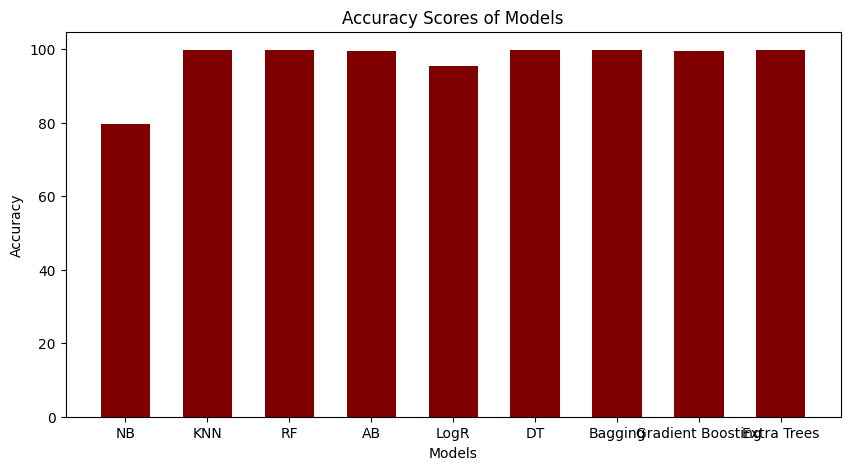

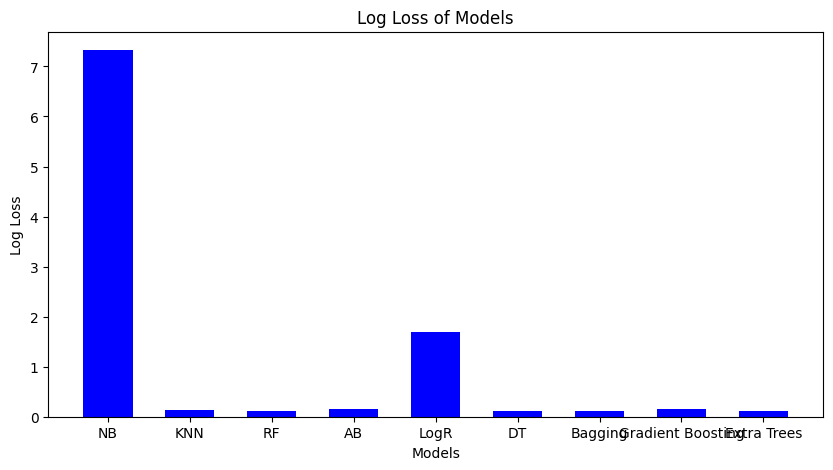

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have stored all your model names in a list
models = ['NB', 'KNN', 'RF', 'AB', 'LogR', 'DT','Bagging','Gradient Boosting','Extra Trees']

# And the corresponding accuracy scores in another list
accuracy_scores = [accuracy_score(y_test,  gnb_prediction)*100,
                   accuracy_score(y_test, KNN_prediction)*100,
                   accuracy_score(y_test,  RF_prediction)*100,
                   accuracy_score(y_test,  AB_prediction)*100,
                   accuracy_score(y_test,  LogR_prediction)*100,
                   accuracy_score(y_test,  DT_prediction)*100,
                   accuracy_score(y_test, bagging_prediction)*100,
                   accuracy_score(y_test, gradient_boosting_prediction)*100,
                   accuracy_score(y_test, extra_trees_prediction)*100]

# Plotting accuracy scores
plt.figure(figsize=(10,5))
plt.bar(models, accuracy_scores, color ='maroon', width = 0.6)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores of Models")
plt.show()

# For loss entropy, you need to calculate it first. Here is an example with Log Loss for binary classification problems
from sklearn.metrics import log_loss

# Calculate Log Loss


# Plotting Log Loss
plt.figure(figsize=(10,5))
plt.bar(models, log_loss_results, color ='blue', width = 0.6)
plt.xlabel("Models")
plt.ylabel("Log Loss")log_loss_results = [log_loss(y_test, gnb_prediction),
                    log_loss(y_test, KNN_prediction),
                    log_loss(y_test, RF_prediction),
                    log_loss(y_test, AB_prediction),
                    log_loss(y_test, LogR_prediction),
                    log_loss(y_test, DT_prediction),
                    log_loss(y_test, bagging_prediction),
                    log_loss(y_test, gradient_boosting_prediction),
                    log_loss(y_test, extra_trees_prediction)]
plt.title("Log Loss of Models")
plt.show()

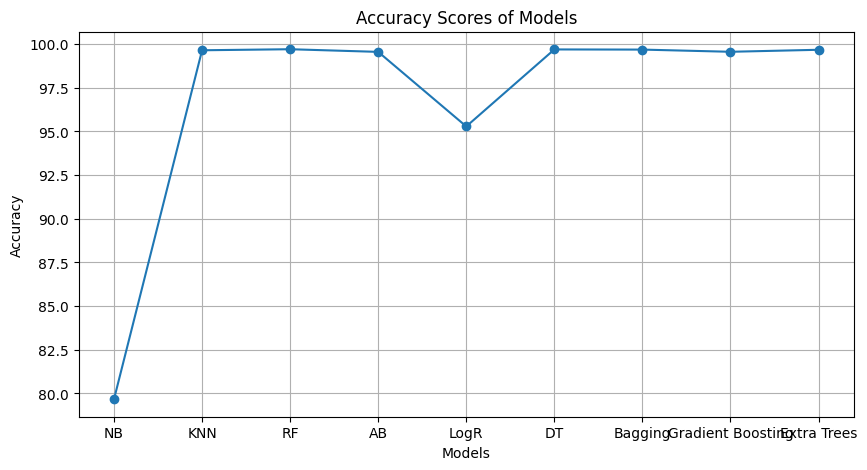

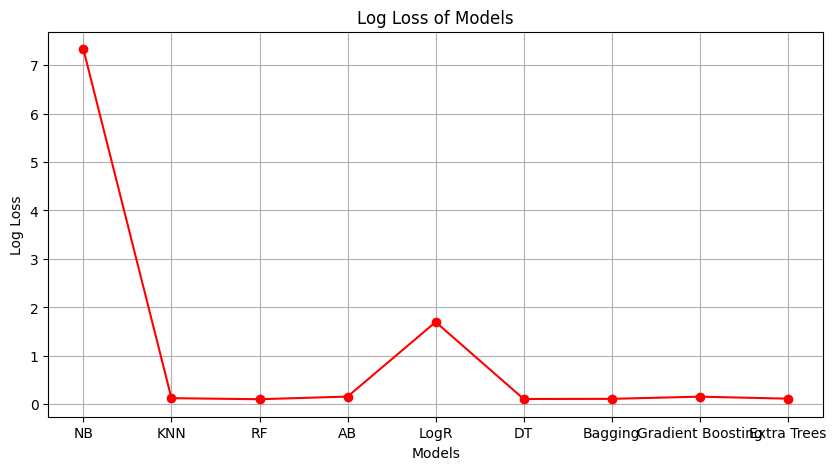

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have stored all your model names in a list
models = ['NB', 'KNN', 'RF', 'AB', 'LogR', 'DT','Bagging','Gradient Boosting','Extra Trees']

# And the corresponding accuracy scores in another list
accuracy_scores = [accuracy_score(y_test,  gnb_prediction)*100,
                   accuracy_score(y_test, KNN_prediction)*100,
                   accuracy_score(y_test,  RF_prediction)*100,
                   accuracy_score(y_test,  AB_prediction)*100,
                   accuracy_score(y_test,  LogR_prediction)*100,
                   accuracy_score(y_test,  DT_prediction)*100,
                   accuracy_score(y_test, bagging_prediction)*100,
                   accuracy_score(y_test, gradient_boosting_prediction)*100,
                   accuracy_score(y_test, extra_trees_prediction)*100]


# Plotting accuracy scores
plt.figure(figsize=(10,5))
plt.plot(models, accuracy_scores, marker='o')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores of Models")
plt.grid(True)
plt.show()

# For loss entropy, you need to calculate it first. Here is an example with Log Loss for binary classification problems
from sklearn.metrics import log_loss

# Calculate Log Loss
log_loss_results = [log_loss(y_test, gnb_prediction),
                    log_loss(y_test, KNN_prediction),
                    log_loss(y_test, RF_prediction),
                    log_loss(y_test, AB_prediction),
                    log_loss(y_test, LogR_prediction),
                    log_loss(y_test, DT_prediction),
                    log_loss(y_test, bagging_prediction),
                    log_loss(y_test, gradient_boosting_prediction),
                    log_loss(y_test, extra_trees_prediction)]

# Plotting Log Loss
plt.figure(figsize=(10,5))
plt.plot(models, log_loss_results, marker='o', color='r')
plt.xlabel("Models")
plt.ylabel("Log Loss")
plt.title("Log Loss of Models")
plt.grid(True)
plt.show()

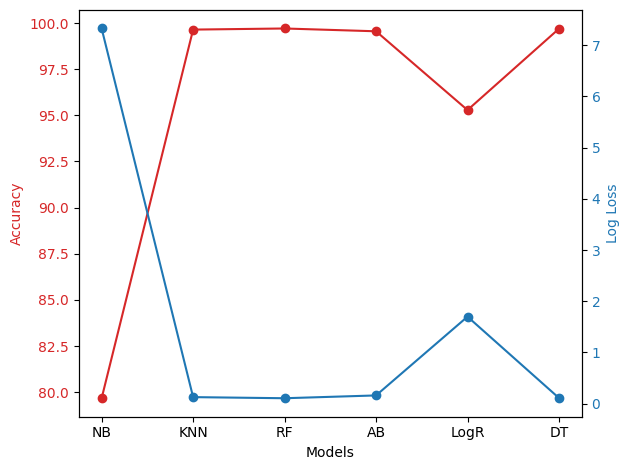

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have stored all your model names in a list
models = ['NB', 'KNN', 'RF', 'AB', 'LogR', 'DT']

# And the corresponding accuracy scores in another list
accuracy_scores = [accuracy_score(y_test,  gnb_prediction)*100,
                   accuracy_score(y_test, KNN_prediction)*100,
                   accuracy_score(y_test,  RF_prediction)*100,
                   accuracy_score(y_test,  AB_prediction)*100,
                   accuracy_score(y_test,  LogR_prediction)*100,
                   accuracy_score(y_test,  DT_prediction)*100]

# Calculate Log Loss
log_loss_results = [log_loss(y_test, gnb_prediction),
                    log_loss(y_test, KNN_prediction),
                    log_loss(y_test, RF_prediction),
                    log_loss(y_test, AB_prediction),
                    log_loss(y_test, LogR_prediction),
                    log_loss(y_test, DT_prediction)]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(models, accuracy_scores, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Log Loss', color=color)  
ax2.plot(models, log_loss_results, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

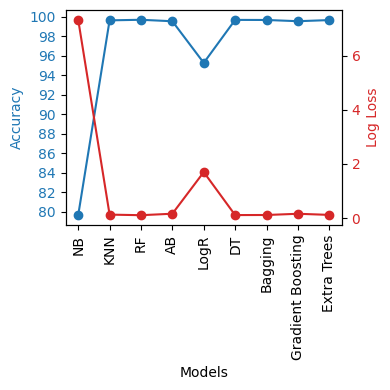

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Assuming you have stored all your model names in a list
models = ['NB', 'KNN', 'RF', 'AB', 'LogR', 'DT','Bagging','Gradient Boosting','Extra Trees']

# Initialize lists to store accuracy scores and log loss results
accuracy_scores = [accuracy_score(y_test,  gnb_prediction)*100,
                   accuracy_score(y_test, KNN_prediction)*100,
                   accuracy_score(y_test,  RF_prediction)*100,
                   accuracy_score(y_test,  AB_prediction)*100,
                   accuracy_score(y_test,  LogR_prediction)*100,
                   accuracy_score(y_test,  DT_prediction)*100,
                   accuracy_score(y_test, bagging_prediction)*100,
                   accuracy_score(y_test, gradient_boosting_prediction)*100,
                   accuracy_score(y_test, extra_trees_prediction)*100]

log_loss_results = [log_loss(y_test, gnb_prediction),
                    log_loss(y_test, KNN_prediction),
                    log_loss(y_test, RF_prediction),
                    log_loss(y_test, AB_prediction),
                    log_loss(y_test, LogR_prediction),
                    log_loss(y_test, DT_prediction),
                    log_loss(y_test, bagging_prediction),
                    log_loss(y_test, gradient_boosting_prediction),
                    log_loss(y_test, extra_trees_prediction)]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(4,4))

# Plot accuracy scores
color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(models, accuracy_scores, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Rotate x-labels
plt.xticks(rotation=90)
ax1.set_yticks(range(80, 101, 2))


# Instantiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot log loss
color = 'tab:red'
ax2.set_ylabel('Log Loss', color=color)
ax2.plot(models, log_loss_results, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Improve layout
fig.tight_layout()

# Rotate x-labels
plt.xticks(rotation='horizontal')

# Display the plot
plt.show()
